In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import glob
import re, os

In [44]:
!pwd

/Users/Devansh/Documents/GitHub/deep_learnt_controls/Simple_Spacecraft


In [45]:
data_s = []
first_row_s = []
data_c = []
first_row_c = []
to_be_deleted = []

index_s = set()
index_c = set()
    
    
for infile in glob.glob("data_apollo/*_sim_s.csv"):
    df = pd.read_csv(infile)
    
    numbers = re.findall('\d+',infile)
    index_s.add(int(numbers[0]))
    
    
    
for infile in glob.glob("data_apollo/*_sim_c.csv"):
    
    numbers = re.findall('\d+',infile)
    index_c.add(int(numbers[0]))
    
    

In [46]:
common_index = index_s.intersection(index_c)

#loop over common intersection
data_s = []
data_c = []

data_s_first = []
data_c_first = []



for ind in common_index:
    df_s = pd.read_csv(f"data_apollo/{ind}_sim_s.csv")
    df_c = pd.read_csv(f"data_apollo/{ind}_sim_c.csv")
    
    data_s.append(df_s)
    data_c.append(df_c)
    
    data_s_first.append(list(df_s.iloc[0]))
    data_c_first.append(list(df_c.iloc[0]))
    
    
    
df_s_full = pd.concat(data_s)
df_s_first = pd.DataFrame(data_s_first)
df_c_full = pd.concat(data_c)
df_c_first = pd.DataFrame(data_c_first)

In [47]:
if 0:
    df_s_full.to_csv('data_apollo/df_s_full.csv', index=False)
    df_c_full.to_csv('data_apollo/df_c_full.csv', index=False)
    

In [48]:
df_s_full.describe()

,0,1,2,3,4
count,1.005131e+06,1.005131e+06,1.005131e+06,1.005131e+06,1.005131e+06
mean,-4.834186e-01,3.493196e+02,1.703582e-03,-5.630086e+00,9.197066e+03
std,6.445491e+01,4.242044e+02,1.276398e+00,6.036069e+00,1.266729e+03
min,-2.668587e+02,-5.096018e-05,-9.986852e+00,-2.999913e+01,4.923601e+03
25%,-2.362725e+01,2.113625e+01,-4.030250e-01,-8.537216e+00,8.221807e+03
50%,8.405463e-06,1.639712e+02,-4.760488e-05,-3.452476e+00,9.170576e+03
75%,2.334506e+01,5.485121e+02,3.957057e-01,-8.727151e-01,1.019006e+04
max,2.662611e+02,1.999883e+03,9.962962e+00,6.706928e-03,1.199958e+04


In [49]:
df_c_full.describe()

,0,1
count,1.005131e+06,1.005131e+06
mean,3.587366e-01,-4.850035e-05
std,5.994025e-02,2.458132e-02
min,1.816036e-01,-3.381538e-01
25%,3.153627e-01,-4.443058e-03
50%,3.556088e-01,2.255637e-06
75%,3.984233e-01,4.560047e-03
max,7.793081e-01,3.618129e-01


In [50]:
df_c_first.describe()

,0,1
count,4456.000000,4456.000000
mean,0.430311,-0.000669
std,0.067832,0.080874
min,0.299151,-0.338154
25%,0.379476,-0.048016
50%,0.424602,-0.000517
75%,0.472307,0.045291
max,0.779308,0.361813


In [51]:
df_s_first.describe()

,0,1,2,3,4
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,-0.334326,1260.376769,0.028389,-19.827597,10005.208802
std,113.171859,431.903008,4.375004,6.733894,1166.779751
min,-199.947030,500.056565,-9.986852,-29.999132,8000.374597
25%,-97.225527,879.733812,-3.031745,-25.470990,8989.347912
50%,0.313993,1265.257278,-0.002821,-20.759381,10003.782871
75%,94.590865,1634.018771,3.081648,-15.107559,11021.906359
max,199.882057,1999.882741,9.962962,-1.590800,11999.575845


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11efd7908>],
      dtype=object)

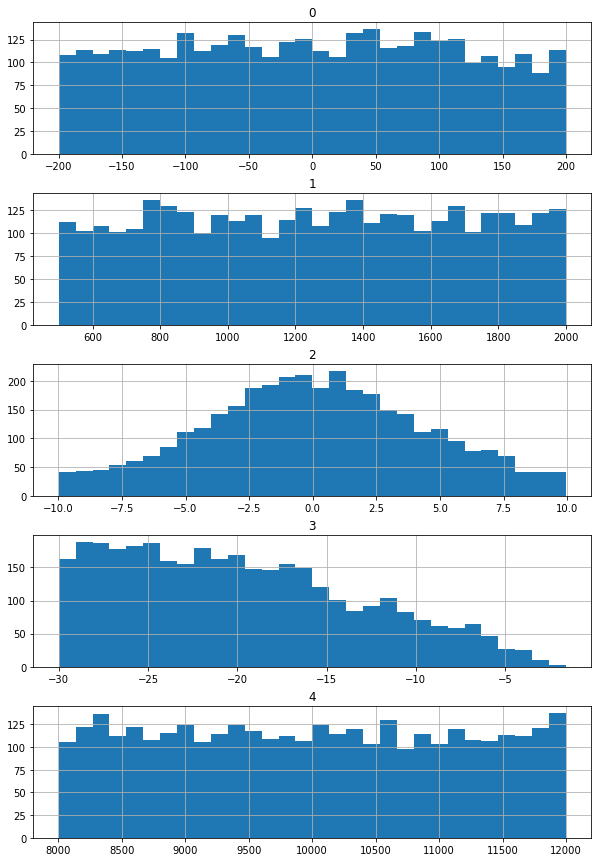

In [15]:
df_s_first.hist(bins=30, figsize=(10,15), layout=(5,1))

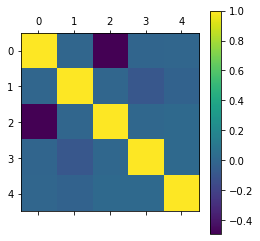

In [16]:
plt.matshow(df_s_first.corr())
plt.colorbar()

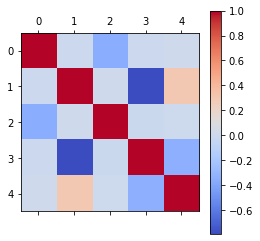

In [17]:
plt.matshow(df_s_full.corr())
plt.colorbar()
plt.set_cmap('coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1249483c8>],
      dtype=object)

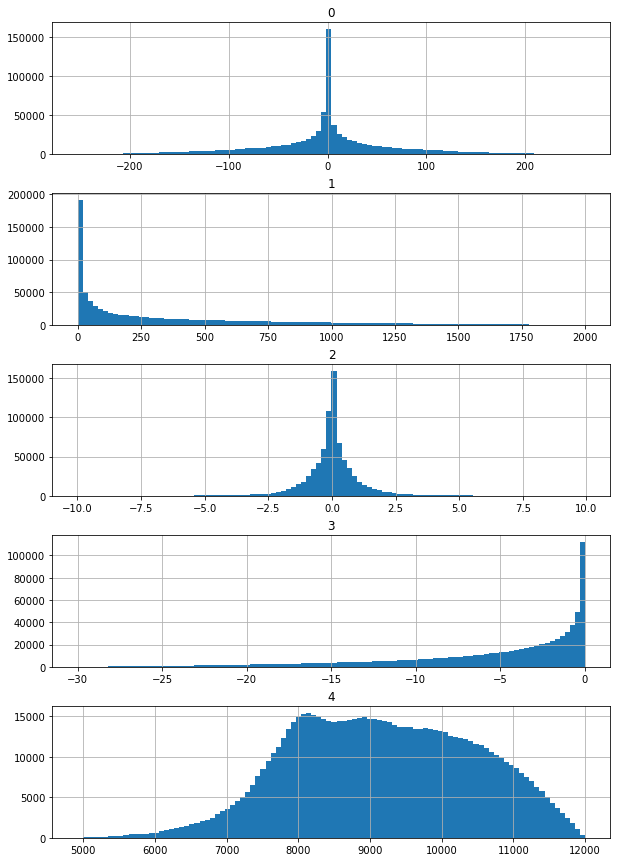

In [18]:
df_s_full.hist(bins=100, figsize=(10,15), layout=(5,1))

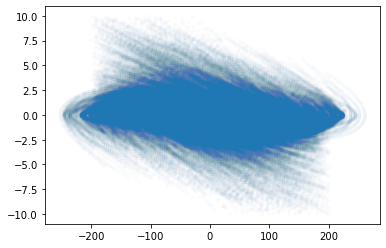

In [19]:
plt.scatter(df_s_full['0'],df_s_full['2'],marker='.',alpha=0.01)

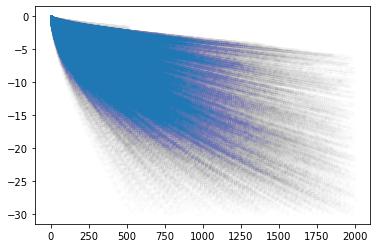

In [20]:
plt.scatter(df_s_full['1'],df_s_full['3'],marker='.',alpha=0.005)

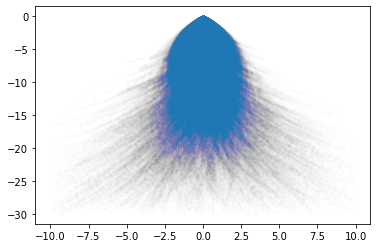

In [21]:
plt.scatter(df_s_full['2'],df_s_full['3'],marker='.',alpha=0.005)

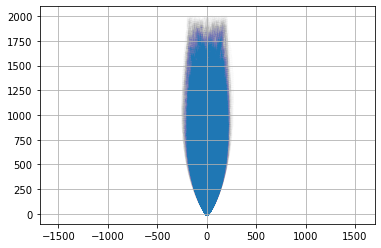

In [22]:
plt.scatter(df_s_full['0'],df_s_full['1'],marker='.',alpha=0.005)
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.grid()

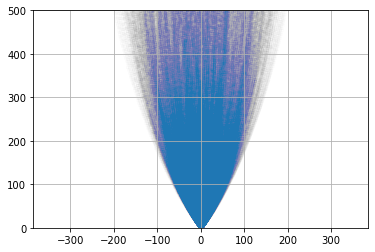

In [23]:
plt.scatter(df_s_full['0'],df_s_full['1'],marker='.',alpha=0.005)
ax = plt.gca()
plt.ylim([0, 500])
plt.xlim([-100, 100])
ax.set_aspect('equal', 'datalim')
plt.grid()

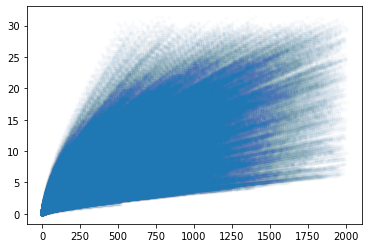

In [24]:
plt.scatter((df_s_full['0']**2+df_s_full['1']**2)**0.5,(df_s_full['2']**2+df_s_full['3']**2)**0.5,marker='.',alpha=0.01)

In [25]:
df_s_full.shape

(782871, 5)

In [26]:
df_c_full.shape

(782871, 2)

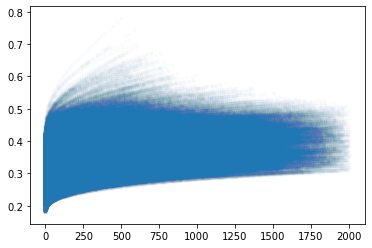

In [27]:
plt.scatter((df_s_full['0']**2+df_s_full['1']**2)**0.5,df_c_full['0'],marker='.',alpha=0.01)

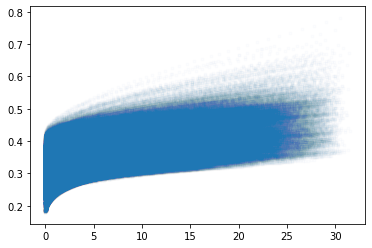

In [28]:
plt.scatter((df_s_full['2']**2+df_s_full['3']**2)**0.5,df_c_full['0'],marker='.',alpha=0.01)

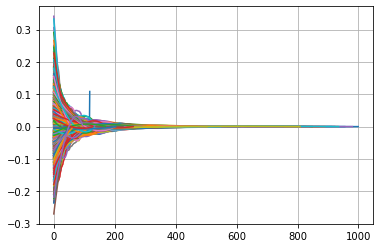

In [29]:
plt.figure()

for ind in range(2000):
    try:
        df = pd.read_csv(f'data_apollo/{ind}_sim_c.csv')
        plt.plot(df['1'])
    except:

        pass

ax = plt.gca()
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127434cc0>],
      dtype=object)

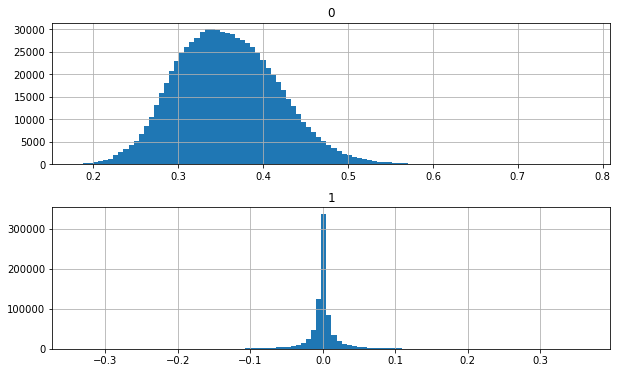

In [30]:
df_c_full.hist(bins=100, figsize=(10,6), layout=(2,1))

In [31]:
df_c_full['1'].describe()

count    782871.000000
mean         -0.000124
std           0.024535
min          -0.338154
25%          -0.004446
50%          -0.000003
75%           0.004527
max           0.361813
Name: 1, dtype: float64

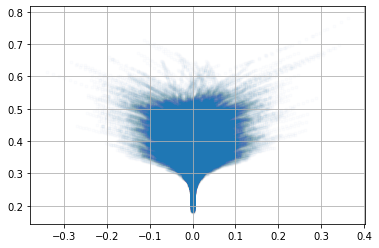

In [32]:
plt.scatter(df_c_full['1'],df_c_full['0'],marker='.',alpha=0.01)
plt.grid()

In [52]:
load_df_c = pd.read_csv('data_apollo/df_c_full.csv')

In [53]:
load_df_c.head()

,0,1
0,0.452203,0.116846
1,0.451007,0.113926
2,0.447859,0.106262
3,0.446306,0.102498
4,0.445612,0.100820


In [54]:
load_df_c.describe()

,0,1
count,1.005131e+06,1.005131e+06
mean,3.587366e-01,-4.850035e-05
std,5.994025e-02,2.458132e-02
min,1.816036e-01,-3.381538e-01
25%,3.153627e-01,-4.443058e-03
50%,3.556088e-01,2.255637e-06
75%,3.984233e-01,4.560047e-03
max,7.793081e-01,3.618129e-01


In [55]:
load_df_s = pd.read_csv('data_apollo/df_s_full.csv')

In [56]:
load_df_s.head()

,0,1,2,3,4
0,-179.907153,1823.692772,-5.063272,-29.673951,10161.122668
1,-187.264207,1779.519035,-4.725097,-29.192948,10151.352297
2,-204.470593,1665.220331,-3.867187,-27.929467,10125.423530
3,-211.817197,1609.952764,-3.461713,-27.308197,10112.526860
4,-214.861531,1585.486409,-3.284266,-27.030902,10106.737936


In [57]:
load_df_s.describe()

,0,1,2,3,4
count,1.005131e+06,1.005131e+06,1.005131e+06,1.005131e+06,1.005131e+06
mean,-4.834186e-01,3.493196e+02,1.703582e-03,-5.630086e+00,9.197066e+03
std,6.445491e+01,4.242044e+02,1.276398e+00,6.036069e+00,1.266729e+03
min,-2.668587e+02,-5.096018e-05,-9.986852e+00,-2.999913e+01,4.923601e+03
25%,-2.362725e+01,2.113625e+01,-4.030250e-01,-8.537216e+00,8.221807e+03
50%,8.405463e-06,1.639712e+02,-4.760488e-05,-3.452476e+00,9.170576e+03
75%,2.334506e+01,5.485121e+02,3.957057e-01,-8.727151e-01,1.019006e+04
max,2.662611e+02,1.999883e+03,9.962962e+00,6.706928e-03,1.199958e+04


In [ ]:
df_c